In [1]:
import pandas as pd
import time,datetime

#### 加载数据

In [32]:
tags = pd.read_csv('E:\\Desktop\\ml-25m\\tags.csv')  # 用户给电影打的标签
ratings = pd.read_csv('E:\\Desktop\\ml-25m\\ratings.csv') # 用户给电影的评分
movies = pd.read_csv('E:\\Desktop\\ml-25m\\movies.csv') # 电影信息
links = pd.read_csv('E:\\Desktop\\ml-25m\\links.csv') # 电影链接到其他资源

In [25]:
tags.head(10)

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455
5,4,44665,unreliable narrators,1573943619
6,4,115569,tense,1573943077
7,4,115713,artificial intelligence,1573942979
8,4,115713,philosophical,1573943033
9,4,115713,tense,1573943042


In [33]:
ratings.tail()

,userId,movieId,rating,timestamp
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434
25000094,162541,63876,5.0,1240952515


In [5]:
links.tail()

,movieId,imdbId,tmdbId
62418,209157,6671244,499546.0
62419,209159,297986,63407.0
62420,209163,6755366,553036.0
62421,209169,249603,162892.0
62422,209171,55323,79513.0


#### 1. 一共有多少不同的用户

In [7]:
data1 = tags.append(ratings)['userId'] #合并两个含有用户信息的表

In [8]:
print('一共有%d个不同的用户'%len(data1.drop_duplicates())) # 去重

一共有162541个不同的用户


#### 2. 一共有多少不同的电影

In [9]:
print('一共有%d个不同的电影'%len(movies['movieId'].drop_duplicates())) 

一共有62423个不同的电影


#### 3.一共有多少不同的电影种类

In [10]:
temp_list=movies['genres'].str.split("|").tolist()
print('一共有%d不同的电影种类'%len(list(set([i for j in temp_list for i in j ]))))

一共有20不同的电影种类


#### 4. 一共有多少电影没有外部链接

In [11]:
print('一共有%d部电影没有外部链接'%(len(movies['movieId'].drop_duplicates())-len(links['movieId'].drop_duplicates())))

一共有0部电影没有外部链接


#### 5. 2018年一共有多少人进行过电影评分

In [6]:
#时间戳转换函数
def tim(stamp):  
    timeArray = time.localtime(stamp)
    otherStyleTime = time.strftime("%Y",timeArray)
    return otherStyleTime

In [7]:
ratings['timestamp']=ratings['timestamp'].apply(tim)

In [45]:
print('2018年一共有%d人进行过电影评分'%(len(ratings[ratings.timestamp=='2018'].drop_duplicates(['userId']))))

2018年一共有11999人进行过电影评分


#### 6. 2018年评分5分以上的电影及其对应的标签

In [24]:
# 1、找出2018年评分5分以上的电影
a = ratings[ratings.timestamp=='2018'].groupby('movieId').agg({'rating':'mean'})
b = a.loc[a['rating']==5.0]
b

,rating
movieId,
244,5.0
389,5.0
476,5.0
650,5.0
834,5.0
...,...
196887,5.0
196889,5.0
196959,5.0


In [29]:
# 2、获取2018年每个电影的标签
tags['timestamp']=tags['timestamp'].apply(tim)
m = tags[tags.timestamp=='2018']
n = (m[['movieId','tag']].drop_duplicates()).sort_values(by=['movieId'],ascending=True)
res = pd.DataFrame(n.groupby(['movieId']).apply(lambda x:'、'.join(x['tag'])),columns=['tag'])
res

,tag
movieId,
1,cgi、friendship、jealousy、martial arts、mission、n...
2,based on children's book、board game、disappeara...
3,old man、best friend、duringcreditsstinger、fishing
4,based on novel or book、divorce、chick flick、int...
5,pregnancy、parent child relationship、midlife cr...
...,...
196997,horror、smoking、game design、literature、father、f...
197003,Great set
197049,spinal tap-esque、revelatory、entertaining


In [31]:
# 3、左连接
ans = b.merge(res,how="left",on="movieId")
ans.head(10)

,rating,tag
movieId,,
244,5.0,NaN
389,5.0,NaN
476,5.0,NaN
650,5.0,death of husband、evil priest、mother daughter r...
834,5.0,african american、beach、mercedes、obesity、summer...
1168,5.0,werewolf、norse mythology、lycanthrope、dog、anima...
1360,5.0,Cannes、Criterion
1525,5.0,american football、chinese food、kangaroo、mythology
1890,5.0,NaN


#### 7、绘制电影复仇者联盟（The Avengers）每个月评分的平均值变化曲线图

In [45]:
# 1、找出复仇者联盟电影每个月评分的平均值
def tim(stamp):  
    timeArray = time.localtime(stamp)
    otherStyleTime = time.strftime("%Y%m",timeArray)
    return otherStyleTime
ratings['timestamp']=ratings['timestamp'].apply(tim)

In [51]:
Avengers = ratings[ratings.movieId==89745].groupby('timestamp').agg({'rating':'mean'})

In [52]:
Avengers = Avengers.sort_values(by=['timestamp'],ascending=True)

In [53]:
Avengers

,rating
timestamp,
201109,4.000000
201204,4.375000
201205,4.186158
201206,4.161088
201207,4.130556
...,...
201907,3.517241
201908,3.633880
201909,3.671111


In [54]:
import matplotlib.pyplot as plt

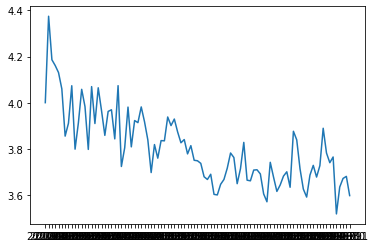

In [56]:
plt.plot(Avengers)
plt.show()